In [6]:
from gurobipy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# n = 100
# m = 10
# X = np.random.randn(n,m+1)


## Load the boston housing dataset

bh = pd.read_csv('certifying-stability/housing.csv', sep=',')

# pick medv as our resoponses (following Moitra-Rohatgi)
y = bh["medv"]

In [8]:
bh

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# regress all pairs of other features against medv
# in each case, use gurobi to find the min amount of samples (fractionally)
# that need to be removed to get that feature's coefficient to go to 0
# in OLS

gaps = []
objbounds = []
objvals = []

count = 0
tot = 14 * 14

for index1 in bh.keys():
    if index1 not in ["medv"]:
        for index2 in bh.keys():
            if index2 not in ["medv", index1]:
                
                # now index1 and index2 are the two features we'll use
                
                print("starting trial " + str(count) + " out of " + str(tot))
                count += 1
                
                X = bh[[index1,index2]].to_numpy()
                n = len(X)
                m=2
                
                model = Model("bilinear")
                
                # add one variable to the model for each sample

                W = [model.addVar(name="w" + str(i), vtype=GRB.CONTINUOUS) for i in range(n)]
                model.update()
                
                # add a variable to represent the regression coefficient on index2
                
                beta = model.addVar(name="beta", vtype=GRB.CONTINUOUS)
                
                model.update()
                
                for i in range(n):
                    model.addConstr( 0 <= W[i] )
                    model.addConstr( W[i] <= 1 )
    
                model.setObjective(sum(W), GRB.MAXIMIZE)
        
                # these guys ensure that the gradient of the least-squares objective is 0
                # when the coeff. for index1 is 0 and the coeff for index2 is beta
                model.addConstr(sum([ W[i] * X[i,0] * (X[i,0] * beta - y[i]) for i in range(n)]) == 0)
                model.addConstr(sum([ W[i] * X[i,1] * (X[i,0] * beta - y[i]) for i in range(n)]) == 0)
                
                model.update()
                
                model.Params.NonConvex = 2
                model.Params.TimeLimit = 10
                model.Params.LogToConsole = 0
                
                model.optimize()
                
                gaps.append(model.MIPGap)
                objbounds.append(model.ObjBound)
                objvals.append(model.ObjVal)        
                
                print("got obj val " + str(model.ObjVal) + ", bound " + str(model.ObjBound) + ", and gap " + str(model.MIPGap))

starting trial 0 out of 196
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-05
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 372.0, bound 372.0, and gap 0.0
starting trial 1 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 225.6035503501447, bound 225.604858163667, and gap 5.796954526019636e-06
starting trial 2 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 470.99999999999994, bound 470.99999999999994, and gap 0.0
starting trial 3 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 77.10563202198976, bound 77.11051530297857, and gap 6.333235148651913e-05
starting trial 4 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 59.73978622046904, bound 59.74014548963673, and gap 6.0139011271768136e-06
starting trial 5 out of 196
Set parameter 

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 35.52988118811882, bound 35.52988118811882, and gap 0.0
starting trial 46 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 43.07860610640402, bound 43.07860610640402, and gap 0.0
starting trial 47 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 54.615305239544966, bound 54.615305239544966, and gap 0.0
starting trial 48 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 382.3448692216852, bound 382.3517088542656, and gap 1.7888647477686205e-05
starting trial 49 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 375.33625744507384, bound 375.3364371102325, and gap 4.786778657935338e-07
starting trial 50 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 320.3438449301424, bound 320.35731902

got obj val 271.133928898331, bound 271.14219925282487, and gap 3.0502838679944703e-05
starting trial 90 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 308.1969913296268, bound 308.22091426579755, and gap 7.762222488776313e-05
starting trial 91 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 363.2007381171785, bound 363.20824406959383, and gap 2.066612654544577e-05
starting trial 92 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 343.2001088996979, bound 343.20533728230157, and gap 1.523421021171486e-05
starting trial 93 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 324.0227672401118, bound 324.02316575496616, and gap 1.229897694330749e-06
starting trial 94 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 259.10685481210845, bound 259.1309849282535, and gap 

Set parameter TimeLimit to value 10
got obj val 476.72200884286406, bound 476.73237636241197, and gap 2.1747516069328412e-05
starting trial 135 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 496.83730158797664, bound 496.8521865884835, and gap 2.9959506782784336e-05
starting trial 136 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 497.7778635111626, bound 497.7778799345628, and gap 3.29934322420575e-08
starting trial 137 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 318.32529210151284, bound 318.3562781999581, and gap 9.734098802115035e-05
starting trial 138 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 501.3944638485019, bound 501.4026930273718, and gap 1.64125842290576e-05
starting trial 139 out of 196
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
got obj val 453.689426147

In [59]:
# this is just some test code/scratchpad

index1 = "indus"
index2 = "dis"


X = bh[[index1,index2]].to_numpy()
n = len(X)
m=2
                
model = Model("bilinear")

W = [model.addVar(name="w" + str(i), vtype=GRB.CONTINUOUS) for i in range(n)]
model.update()
                
beta = model.addVar(name="beta", vtype=GRB.CONTINUOUS)
                
model.update()
                
for i in range(n):
    model.addConstr( 0 <= W[i] )
    model.addConstr( W[i] <= 1 )
    
model.setObjective(sum(W), GRB.MAXIMIZE)

        
model.addConstr(sum([ W[i] * X[i,0] * ( X[i,0] * beta - y[i] ) for i in range(n)]) == 0)
model.addConstr(sum([ W[i] * X[i,1] * (X[i,0] * beta - y[i]) for i in range(n)]) == 0)
                
model.update()
                
model.Params.NonConvex = 2
model.Params.TimeLimit = 10

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10


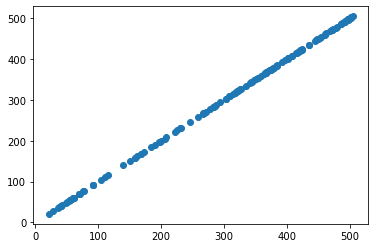

In [7]:
# plot upper vs lower bounds on the sensitivity obtained by gurobi, for each of the trials.
# if the plot is a straight line, it means gurobi got tight upper and lower bounds
# on sensitivity
plt.scatter(objvals, objbounds)

In [15]:
# check the max gap between upper and lower bounds gurobi found
max(gaps)

9.999398963379176e-05

[1, 2]


In [2]:
model = Model("bilinear")

W = [model.addVar(name="w" + str(i), vtype=GRB.CONTINUOUS) for i in range(n)]
model.update()

beta = [model.addVar(name="beta" + str(i), vtype=GRB.CONTINUOUS) for i in range(m)]
model.update()

for i in range(n):
    model.addConstr( 0 <= W[i] )
    model.addConstr( W[i] <= 1 )
    
model.setObjective(sum(W), GRB.MAXIMIZE)

residuals = [sum([X[i,j] * beta[j] for j in range(m)]) - y[i] for i in range(n)]

for j in range(m+1):
    model.addConstr(sum([W[i] * X[i,j] * residuals[i] for i in range(n)]) == 0)

model.update()

model.Params.NonConvex = 2

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-05


NameError: name 'n' is not defined

# can we audit in several dimensions?

In [12]:
X = bh[["crim","zn","indus","chas","nox","rm","age"]].to_numpy()
m = 6
n = len(X)
                
model = Model("bilinear")

W = [model.addVar(name="w" + str(i), vtype=GRB.CONTINUOUS) for i in range(n)]
model.update()
                
betas = [model.addVar(name="beta" + str(i), vtype=GRB.CONTINUOUS) for i in range(m)]
                
model.update()
                
for i in range(n):
    model.addConstr( 0 <= W[i] )
    model.addConstr( W[i] <= 1 )
    
model.setObjective(sum(W), GRB.MAXIMIZE)

residuals = [ sum([X[i,j] * betas[j] - y[i] for j in range(m)]) for i in range(n)]

for j in range(m+1):
    model.addConstr(sum([ W[i] * X[i,j] * residuals[i] for i in range(n)]) == 0)
                
model.update()
                
model.Params.NonConvex = 2
model.Params.TimeLimit = 30

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30


In [13]:
model.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1012 rows, 512 columns and 1012 nonzeros
Model fingerprint: 0xd4bd734a
Model has 7 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [4e-05, 1e+04]
  QLMatrix range   [9e-01, 3e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1012 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Found heuristic solution: objective -0.0000000
Presolve removed 1012 rows and 0 columns
Presolve time: 0.01s
Presolved: 8779 rows, 2706 columns, 29874 nonzeros
Presolved model has 2193 bilinear constraint(s)
Variable types: 2706 continuous, 0 integer (0 binary)

Root relaxation: objective 5.060000e+02, 594 iterations, 0.04 seconds (0.13 work units)

    Nodes    |    Current Node    